<img src="../img/ods_stickers.jpg" />

## 使用 Pandas 进行数据探索

---

#### 介绍

本次实验通过分析电信运营商的客户离网率数据集来熟悉 Pandas 数据探索的常用方法，并构建一个预测客户离网率的简单模型。

#### 知识点

- 排列
- 索引
- 交叉表
- 透视表
- 数据探索

---

<div style="background-color: #FFEAC9; margin-bottom: 10px; padding: 2%; border-radius: 6px;"><p style="line-height: 1.5; font-weight: bold;"> 中文版本说明</p><p style="line-height: 1.5;">本课程中文版本是经由原作者授权 <a href="https://www.shiyanlou.com"><i class="fa fa-external-link-square" aria-hidden="true"> 实验楼</i></a> 编译制作，你可以到 <a href="https://www.shiyanlou.com/courses/1283"><i class="fa fa-external-link-square" aria-hidden="true"> 实验楼课程页面</i></a> 一键启动 Jupyter Notebook 环境学习，若有疑问欢迎到课程页面提出，我们会及时修订。中文版本分发需在遵循原开源协议基础上保留实验楼作为译者署名及链接。</p></div>

### Pandas 的主要方法

Pandas 是基于 NumPy 的一种工具，提供了大量数据探索的方法。Pandas 可以使用类似 SQL 的方式对 .csv、.tsv、.xlsx 等格式的数据进行处理分析。

Pandas 主要使用的数据结构是 Series 和 DataFrame 类。下面简要介绍下这两类：

- Series 是一种类似于一维数组的对象，它由一组数据（各种 NumPy 数据类型）及一组与之相关的数据标签（即索引）组成。
- DataFrame 是一个二维数据结构，即一张表格，其中每列数据的类型相同。你可以把它看成由 Series 实例构成的字典。

下面开始此次实验，我们将通过分析电信运营商的客户离网率数据集来展示 Pandas 的主要方法。

首先载入必要的库，即 NumPy 和 Pandas。

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 教学代码：</i>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

通过 `read_csv()` 方法读取数据，然后使用 `head()` 方法查看前 5 行数据。

In [2]:
df = pd.read_csv(
    '../../data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


上图中的每行对应一位客户，每列对应客户的一个特征。

让我们查看一下该数据库的维度、特征名称和特征类型。

In [3]:
df.shape

(3333, 20)

上述结果表明，我们的列表包含 3333 行和 20 列。下面我们尝试打印列名。

In [4]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

我们还可以使用 `info()` 方法输出 DataFrame 的一些总体信息。

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


`bool`、`int64`、`float64` 和 `object` 是该数据库特征的数据类型。这一方法同时也会显示是否有缺失值，上述结果表明在该数据集中不存在缺失值，因为每列都包含 3333 个观测，和我们之前使用 `shape` 方法得到的数字是一致的。

`astype()` 方法可以更改列的类型，下列公式将 Churn 离网率 特征修改为 `int64` 类型。

In [6]:
df['Churn'] = df['Churn'].astype('int64')

`describe()` 方法可以显示数值特征（`int64` 和 `float64`）的基本统计学特性，如未缺失值的数值、均值、标准差、范围、四分位数等。

In [7]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


通过 include 参数显式指定包含的数据类型，可以查看非数值特征的统计数据。

In [8]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


`value_counts()` 方法可以查看类别（类型为 object ）和布尔值（类型为 bool ）特征。让我们看下 Churn 离网率 的分布。

In [9]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

上述结果表明，在 3333 位客户中， 2850 位是忠实客户，他们的 `Churn` 值为 0。调用 `value_counts()` 函数时，加上 `normalize=True` 参数可以显示比例。

In [10]:
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

### 排序

DataFrame 可以根据某个变量的值（也就是列）排序。比如，根据每日消费额排序（设置 ascending=False 倒序排列）。

In [11]:
df.sort_values(by='Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


此外，还可以根据多个列的数值排序。下面函数实现的功能为：先按 Churn 离网率 升序排列，再按 Total day charge 每日总话费 降序排列，优先级 Churn > Tatal day charge。

In [12]:
df.sort_values(by=['Churn', 'Total day charge'],
               ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### 索引和获取数据

DataFrame 可以以不同的方式进行索引。

使用 `DataFrame['Name']` 可以得到一个单独的列。比如，离网率有多高？

In [13]:
df['Churn'].mean()

0.14491449144914492


对一家公司而言，14.5% 的离网率是一个很糟糕的数据，这么高的离网率可能导致公司破产。

布尔值索引同样很方便，语法是 `df[P(df['Name'])]`，P 是在检查 Name 列每个元素时所使用的逻辑条件。这一索引的输出是 DataFrame 的 Name 列中满足 P 条件的行。

让我们使用布尔值索引来回答这样以下问题：离网用户的数值变量的均值是多少？

In [14]:
df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

离网用户在白天打电话的总时长的均值是多少？

In [15]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

未使用国际套餐（`International plan == NO`）的忠实用户（`Churn == 0`）所打的最长的国际长途是多久？

In [16]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')
   ]['Total intl minutes'].max()

18.9

DataFrame 可以通过列名、行名、行号进行索引。`loc` 方法为通过名称索引，`iloc` 方法为通过数字索引。

通过 `loc` 方法输出 0 至 5 行、State 州 至 Area code 区号 的数据。

In [17]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


通过 `ilo` 方法输出前 5 行的前 3 列数据（和典型的 Python 切片一样，不含最大值）。

In [18]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


`df[:1]` 和 `df[-1:]` 可以得到 DataFrame 的首行和末行。

In [19]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


### 应用函数到单元格、列、行

下面通过 `apply()` 方法应用函数 `max` 至每一列，即输出每列的最大值。

In [20]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

`apply()` 方法也可以应用函数至每一行，指定 axis=1 即可。在这种情况下，使用 `lambda` 函数十分方便。比如，下面函数选中了所有以 W 开头的州。

In [21]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


`map()` 方法可以通过一个 {old_value:new_value} 形式的字典替换某一列中的值。

In [22]:
d = {'No': False, 'Yes': True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


当然，使用 `repalce()` 方法一样可以达到替换的目的。

In [23]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 分组（Groupby）

Pandas 下分组数据的一般形式为：

```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```

对上述函数的解释：

- `groupby()` 方法根据 grouping_columns 的值进行分组。
- 接着，选中感兴趣的列（columns_to_show）。若不包括这一项，那么就会选中所有非 groupby 列（即除 grouping_colums 外的所有列）。
- 最后，应用一个或多个函数（function）。

在下面的例子中，我们根据 Churn 离网率 变量的值对数据进行分组，显示每组的统计数据。

In [24]:
columns_to_show = ['Total day minutes', 'Total eve minutes',
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                         ...   Total night minutes               
                  count        mean        std  ...                   min     50%    max
Churn                                           ...                                     
0                2850.0  175.175754  50.181655  ...                  23.2  200.25  395.0
1                 483.0  206.914079  68.997792  ...                  47.4  204.80  354.9

[2 rows x 18 columns]


和上面的例子类似，只不过这次将一些函数传给 `agg()`，通过 `agg()` 方法对分组后的数据进行聚合。

In [25]:
columns_to_show = ['Total day minutes', 'Total eve minutes',
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                  ...   Total night minutes             
                   mean        std amin  ...                   std  amin   amax
Churn                                    ...                                   
0            175.175754  50.181655  0.0  ...             51.105032  23.2  395.0
1            206.914079  68.997792  0.0  ...             47.132825  47.4  354.9

[2 rows x 12 columns]

### 汇总表

Pandas 中的透视表定义如下：

> 透视表(Pivot Table)是电子表格程序和其他数据探索软件中一种常见的数据汇总工具。它根据一个或多个键对数据进行聚合，并根据行和列上的分组将数据分配到各个矩形区域中。

 通过 `pivot_table()` 方法可以建立透视表，其参数如下：

- values 表示需要计算的统计数据的变量列表
- index 表示分组数据的变量列表
- aggfunc 表示需要计算哪些统计数据，例如，总和、均值、最大值、最小值等。

现在，通过 `pivot_table()` 方法查看不同区号下白天、夜晚、深夜的电话量的均值。

In [26]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


`pivot_table()` 其他的使用方法见 [<i class="fa fa-external-link-square" aria-hidden="true"> Pandas 百题大冲关</i>](https://www.shiyanlou.com/courses/1091/labs/6138/document) 的透视表部分。

交叉表（Cross Tabulation）是一种用于计算分组频率的特殊透视表，在 Pandas 中一般使用 `crosstab()` 方法构建交叉表。

构建一个交叉表查看样本的 Churn 离网率 和 International plan 国际套餐 的分布情况。

In [27]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


构建一个交叉表查看 Churn 离网率 和 Voice mail plan 语音邮件套餐 的分布情况。

In [28]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


上述结果表明，大部分用户是忠实用户，同时他们并不使用额外的服务（国际套餐、语音邮件）。

### 增减 DataFrame 的行列

在 DataFrame 中新增列有很多方法，比如，使用 `insert()`方法添加列，为所有用户计算总的 Total calls 电话量。

In [29]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
    df['Total night calls'] + df['Total intl calls']
# loc 参数是插入 Series 对象后选择的列数
# 设置为 len(df.columns)以便将计算后的 Total calls 粘贴到最后一列
df.insert(loc=len(df.columns), column='Total calls', value=total_calls)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


上面的代码创建了一个中间 Series 实例，即 tatal_calls，其实可以在不创造这个实例的情况下直接添加列。

In [30]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
    df['Total night charge'] + df['Total intl charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


使用 `drop()` 方法删除列和行。

In [31]:
# 移除先前创捷的列
df.drop(['Total charge', 'Total calls'], axis=1, inplace=True)
# 删除行
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


对上述代码的部分解释：

- 将相应的索引 `['Total charge', 'Total calls']` 和 `axis` 参数（1 表示删除列，0 表示删除行，默认值为 0）传给 `drop`。
- `inplace` 参数表示是否修改原始 DataFrame （False 表示不修改现有 DataFrame，返回一个新 DataFrame，True 表示修改当前 DataFrame）。

## 预测离网率

首先，通过上面介绍的 `crosstab()` 方法构建一个交叉表来查看 International plan 国际套餐 变量和 Churn 离网率 的相关性，同时使用 `countplot()` 方法构建计数直方图来可视化结果。

In [32]:
# 加载模块，配置绘图
import matplotlib.pyplot as plt
import seaborn as sns

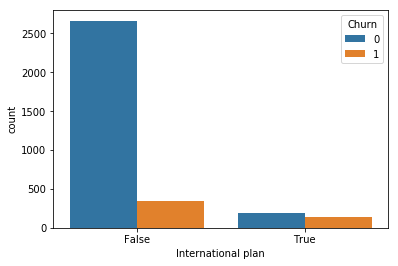

In [33]:
sns.countplot(x='International plan', hue='Churn', data=df)

上图表明，开通了国际套餐的用户的离网率要高很多，这是一个很有趣的观测结果。也许，国际电话高昂的话费让客户很不满意。

同理，查看 Customer service calls 客服呼叫 变量与 Chunrn 离网率 的相关性，并可视化结果。

In [34]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


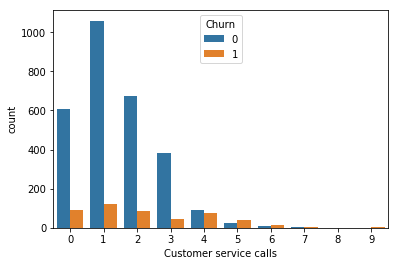

In [35]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

上图表明，在客服呼叫 4 次之后，客户的离网率显著提升。

为了更好的突出 Customer service call 客服呼叫 和 Churn 离网率 的关系，可以给 DataFrame 添加一个二元属性 Many_service_calls，即客户呼叫超过 3 次（Customer service calls > 3）。看下它与离网率的相关性，并可视化结果。

In [36]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


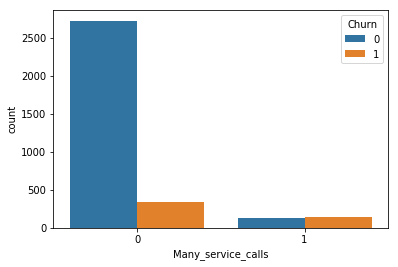

In [37]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df)

现在我们可以创建另一张交叉表，将 Churn 离网率 与 International plan 国际套餐 及新创建的 Many_service_calls 多次客服呼叫 关联起来。



In [38]:
pd.crosstab(df['Many_service_calls'] & df['International plan'], df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


上表表明，在客服呼叫次数超过 3 次并且已办理 International Plan 国际套餐 的情况下，预测一名客户不忠诚的准确率（Accuracy）可以达到 85.8％，计算公式如下：

$$准确率（Accuracy）=\frac{TP+TN}{TP+TN+FP+FN}=\frac{2841+19}{2841+9+19+464}\times100\%$$

其中，TP 表示将 True 预测为 True 的数量，TN 表示将 Flase 预测为 Flase 的数量，FP 表示将 Flase 预测为 True 的数量，FN 表示将 True 预测为 Flase 的数量。

复习一下本次实验的内容：

- 样本中忠实客户的份额为 85.5%。这意味着最简单的预测「忠实客户」的模型有 85.5% 的概率猜对。也就是说，后续模型的准确率（Accuracy）不应该比这个数字少，并且很有希望显著高于这个数字。
- 基于一个简单的「（客服呼叫次数 > 3） & （国际套餐 = True） => Churn = 1, else Churn = 0」规则的预测模型，可以得到 85.8% 的准确率。以后我们将讨论决策树，看看如何仅仅基于输入数据自动找出类似的规则，而不需要我们手工设定。我们没有应用机器学习方法就得到了两个准确率（85.5% 和 85.8%），它们可作为后续其他模型的基线。如果经过大量的努力，我们仅将准确率提高了 0.5%，那么我们努力的方向可能出现了偏差，因为仅仅使用一个包含两个限制规则的简单模型就已提升了 0.3% 的准确率。
- 在训练复杂模型之前，建议预处理一下数据，绘制一些图表，做一些简单的假设。此外，在实际任务上应用机器学习时，通常从简单的方案开始，接着尝试更复杂的方案。

### 实验总结

本次实验使用 Pandas 对数据进行了一定程度的分析和探索，交叉表、透视表等方法的运用将使你在数据探索过程中事半功倍。

<i class="fa fa-link" aria-hidden="true"> 相关链接</i>

- [<i class="fa fa-external-link-square" aria-hidden="true"> Pandas 官方文档</i>](http://pandas.pydata.org/pandas-docs/stable/index.html)
- [<i class="fa fa-external-link-square" aria-hidden="true"> 10 minutes to pandas</i>](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [<i class="fa fa-external-link-square" aria-hidden="true"> Pandas cheatsheet PDF</i>](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [<i class="fa fa-external-link-square" aria-hidden="true"> scipy-lectures.org 教程</i>](http://www.scipy-lectures.org/index.html)
- [<i class="fa fa-external-link-square" aria-hidden="true"> 了解实验楼《楼+ 机器学习和数据挖掘课程》</i>](https://www.shiyanlou.com/louplus/)